In [3]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from scipy import stats
import astropy.units as u
import astropy.constants as c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from analysis.limits import get_limits

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [4]:
def plot_limits(ax, channel, label=None, plot_sigma=True, **kwargs):
    mass_s, inj_s, sigma_s, limit_s = get_limits(channel)
    one_sigma = inj_s * sigma_s
    upper_limit = limit_s
    default_kwargs = dict(ls='-', color='k', marker='s', lw=1, ms=2)
    default_kwargs.update(kwargs)
    ax.plot(mass_s, upper_limit, label=label, **default_kwargs)
    if plot_sigma:
        ax.fill_between(mass_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
        ax.fill_between(mass_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

## 1. pbh-hr

In [5]:
plot_names = {
    'limits' : ['Voyager', 'Comptel', 'INTEGRAL_NEW', 'CMB', 'EGGR', 'BBN'],
    'edges_limits' : ['EDGESevap-Mittal2021', 'EDGESevap-Clark2018', 'EDGESevap-Saha2021'],
    'forecasts' : ['amego'],
    'extras' : ['EGRB', 'LeoTevap', '511keV', 'INTEGRAL', 'SuperK'],
}
plot_names_all = []
for t, fns in plot_names.items():
    plot_names_all += fns

data = {}
for plot_name in plot_names_all:
    m, f = np.loadtxt(f"{WDIR}/data/limits/pbh/{plot_name}.txt", unpack=True) # m is [Msun] or [g], [1]
    if plot_name in ['CMB', 'EGGR', 'GGR', 'BBN']:
        m_g = m # [g], [1]
    else:
        m_g = m * (c.M_sun.to(u.g)).value # [g], [1]
    data[plot_name] = dict(m=m_g, f=f)

In [6]:
def ccmap(x):
    purple = np.array(cms['Purples'](1.0))
    #black = np.array([0, 0, 0, 1])
    blue = np.array(cms['Blues'](1.0))
    white = np.array([1, 1, 1, 1])
    color1 = purple
    color2 = blue * 0.5 + white * 0.5
    color = color1 * x + color2 * (1 - x)
    return tuple(color)

def ccmap2(x):
    purple = np.array(cms['binary'](1.0))
    #black = np.array([0, 0, 0, 1])
    blue = np.array(cms['Blues'](1.0))
    white = np.array([1, 1, 1, 1])
    color1 = purple
    color2 = blue * 0.5 + white * 0.5
    color = color1 * x + color2 * (1 - x)
    return tuple(color)

colors = {
    'CMBevap' :      cms['binary'](0.75),
    'Voyager' :      ccmap(0.6),
    'INTEGRAL_NEW' : ccmap(0.3),
    'Comptel' :      ccmap(0.0),
    'amego' :        cms['Reds'](0.8),
    'CMB':           cms['binary'](0.75),
    'EGGR':          ccmap2(0.4),
    # 'GGR':           ccmap2(0.6),
    'BBN':           ccmap2(0.8),
}
linestyles = {
    'EDGESevap-Clark2018' : '--',
    'EDGESevap-Mittal2021' : ':',
    'EDGESevap-Saha2021' : '-.',
}
labels = {
    'CMBevap' : 'Planck',
    'Voyager' : 'Voyager',
    'INTEGRAL_NEW' : 'Integral',
    'EGRB' : 'EGRB',
    'LeoTevap' : 'Leo T',
    'Comptel' : 'Comptel',
    'amego' : 'AMEGO (proj.)',
    'EDGESevap-Clark2018' : 'EDGES Clark 2018',
    'EDGESevap-Mittal2021' : 'EDGES Mittal 2021',
    'EDGESevap-Saha2021' : 'EDGES Saha 2021',
    'CMB': 'CMB',
    'EGGR': 'Extragal.\n' + r'$\gamma$-rays',
    'GGR': 'GGR',
    'BBN': 'BBN',
}
zorders = {
    'CMBevap' : -1,
    'Voyager' : -2,
    'INTEGRAL_NEW' : -2.5,
    'EGRB' : -3,
    'LeoTevap' : -4,
    'Comptel' : -5,
    'amego' : 10,
    'EDGESevap-Clark2018' : 6,
    'EDGESevap-Mittal2021' : 6,
    'EDGESevap-Saha2021' : 6,
    'CMB': 0,
    'EGGR': -10,
    'GGR': 0,
    'BBN': 0,
}

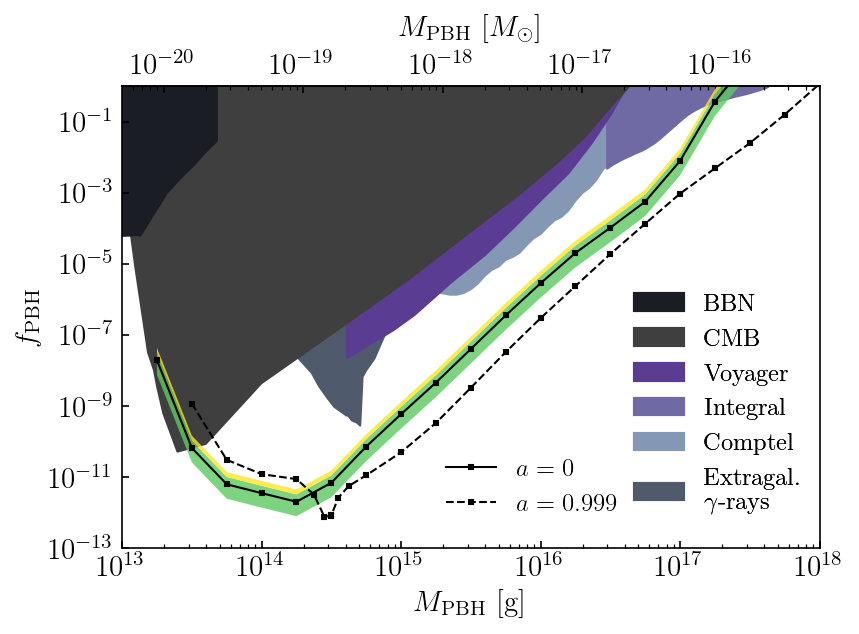

In [8]:
extras = False
edges = False
forecast = False

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plot_limits(ax, 'pbhhr-a0.000-250909', label=r'$a=0$')
plot_limits(ax, 'pbhhr-a0.999-250909', marker='s', plot_sigma=False, label=r'$a=0.999$', ls='--')

# existing limits
f_max = 1e10
ims = []
for n in plot_names['limits']:
    ims.append(ax.fill_between(data[n]['m'], data[n]['f'], f_max, label=labels[n], color=colors[n], zorder=zorders[n]))
if edges:
    for n in plot_names['edges_limits']:
        ims.append(ax.plot(data[n]['m'], data[n]['f'], lw=1, linestyle=linestyles[n], label=labels[n], color=cms['binary'](0.7), zorder=zorders[n]))
if forecast:
    for n in plot_names['forecasts']:
        ims.append(ax.plot(data[n]['m'], data[n]['f'], lw=1, label=labels[n], ls='--', color=colors[n], zorder=zorders[n]))
if extras:
    for n in plot_names['extras']:
        ims.append(ax.plot(data[n]['m'], data[n]['f'], lw=1, label=n, zorder=10))

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [g]', ylabel=r'$f_\mathrm{PBH}$')
ax.set(ylim=(1e-13, 1e0), xlim=(1e13, 1e18))

handles, handle_labels = plt.gca().get_legend_handles_labels()
if edges:
    order = [2, 0, 3, 1, 4, 5, 6, 7]
    ax.legend([handles[idx] for idx in order], [handle_labels[idx] for idx in order], loc='lower right', frameon=False, fontsize=10)
else:
    i1_s = [0, 1]
    i2_s = [7, 5, 2, 4, 3, 6]
    hl1 = [handles[i] for i in i1_s], [handle_labels[i] for i in i1_s]
    hl2 = [handles[i] for i in i2_s], [handle_labels[i] for i in i2_s]
    # hl3 = [handles[i] for i in i3_s], [handle_labels[i] for i in i3_s]
    ax.add_artist(ax.legend(*hl1, loc=(0.45, 0.05), frameon=False))
    ax.add_artist(ax.legend(*hl2, loc=(0.72, 0.05), frameon=False))
    # ax.add_artist(ax.legend(*hl3, loc=(0.7, 0.1), frameon=False))

grams_to_solmass = lambda x: (x * u.g).to(u.solMass).value
solmass_to_grams = lambda x: (x * u.solMass).to(u.g).value
ax2 = ax.secondary_xaxis(location='top', functions=(grams_to_solmass, solmass_to_grams))
ax2.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]', labelpad=8)

fig.savefig('paper2/pbhhr-limits.pdf', bbox_inches='tight')

[(1e-13, 1.0), (10000000000000.0, 1e+18)]

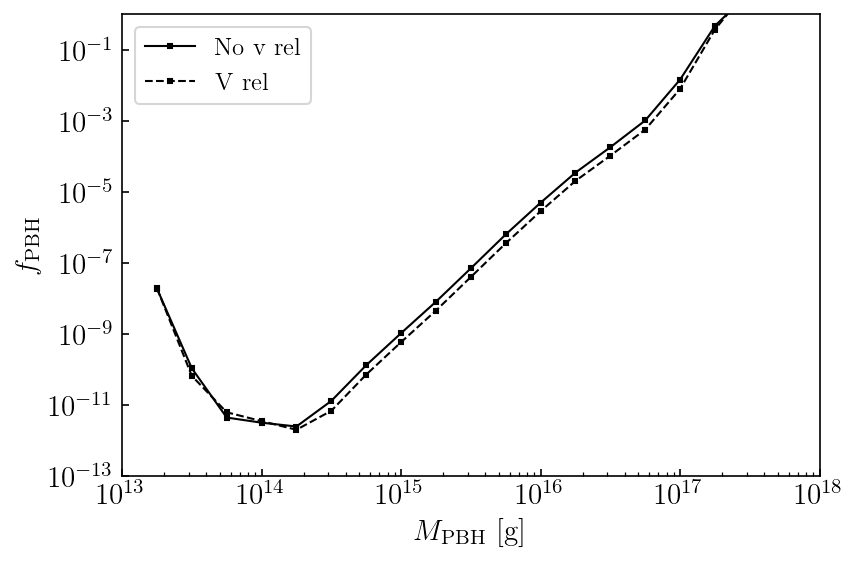

In [3]:
# comparison
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plot_limits(ax, 'pbhhr-a0.000', label=r'No v rel', plot_sigma=False,)
plot_limits(ax, 'pbhhr-a0.000-250808', plot_sigma=False, label=r'V rel', ls='--')

ax.legend()

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [g]', ylabel=r'$f_\mathrm{PBH}$')
ax.set(ylim=(1e-13, 1e0), xlim=(1e13, 1e18))

In [10]:
massp_s, inj_s, sigma_s, limit_s = get_limits('pbhhr-a0.000')
mass_s, inj_s, sigmanew_s, limit_s = get_limits('pbhhr-a0.000-250808')

In [17]:
s = np.array([sigma_s[i] for i in [1, 4, 7, 10, 13, 16, 19]])
s / sigmanew_s

array([1.63558059, 1.23365602, 1.79152378, 1.77760421, 1.73007158,
       1.26922202, 0.97612079])

In [ ]:
sigmanew_s

In [11]:
(1e-20*u.M_sun).to(u.g)

<Quantity 1.98840987e+13 g>

## 2. pwave

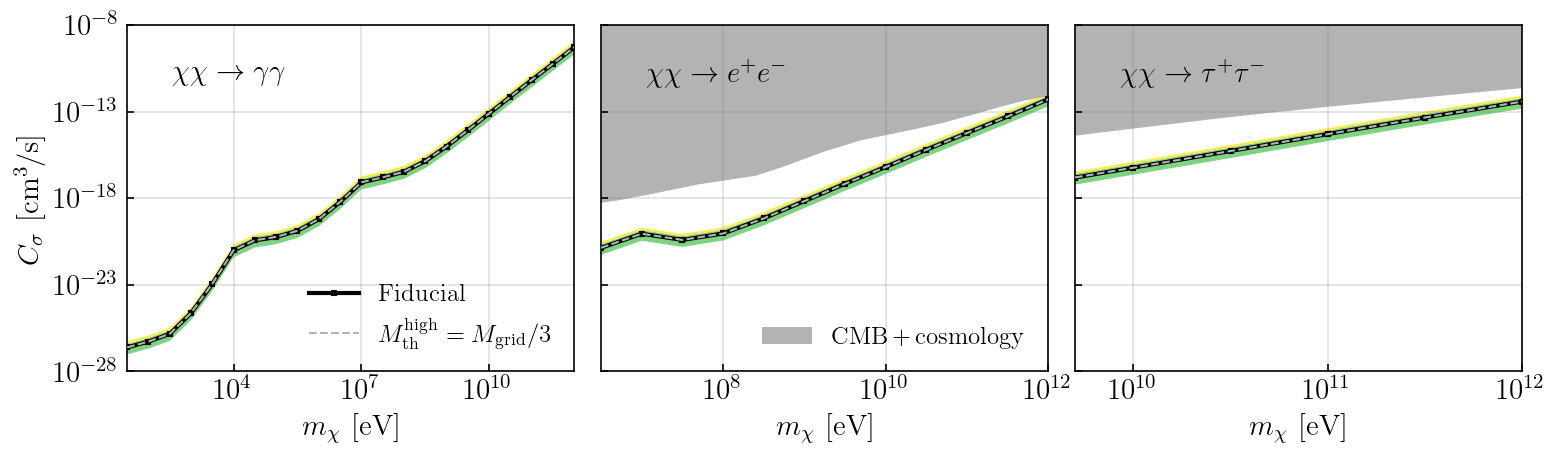

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

limit_tags = ['pwave-phot-250909', 'pwave-elec-250909', 'pwave-tau-250909']
cmp_limit_tags = ['pwave-phot-mc1e11-250909', 'pwave-elec-mc1e11-250909', 'pwave-tau-mc1e11-250909']
texts = [r'$\chi\chi\rightarrow ' + s + '$' for s in [r'\gamma\gamma', r'e^+e^-', r'\tau^+\tau^-']]
xlims = [[3.162277660168379612e+01, 1e12], [3.162277660168379545e+06, 1e12], [5.011872336272714615e+09, 1e12]]

for i, ax in enumerate(axs):
    plot_limits(ax, limit_tags[i], lw=2, label=('Fiducial' if i == 0 else None))
    plot_limits(ax, cmp_limit_tags[i], plot_sigma=False, color=cms['binary'](0.3), ls='--', marker='', zorder=10,
                label=(r'$M_\mathrm{th}^\mathrm{high}=M_\mathrm{grid}/3$' if i == 0 else None))
    ax.set(xscale='log', yscale='log')
    ax.set(xlabel=r'$m_\chi$ [eV]', xlim=xlims[i])
    ax.text(0.1, 0.9, texts[i], transform=ax.transAxes, fontsize=14, ha='left', va='top')
    ax.grid(color='0.5', alpha=0.2, linewidth=1, linestyle='-')

# phph limits
m, C_plot = np.loadtxt(f"{WDIR}/data/limits/pwave/phph.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
m_plot = m * 1e6 # [MeV] -> [eV]
axs[0].fill_between(m_plot, C_plot, 1, fc=cms['binary'](0.3), ec='none', label=r'CMB\,+\,cosmology')
axs[0].legend(frameon=False, loc='lower right')

# ee limits
m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/ee.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
vref = 100 * u.km / u.s
m_plot = m * 1e9 # [GeV] -> [eV]
C_plot = sigmav * (c.c / vref).to(1).value ** 2
axs[1].fill_between(m_plot, C_plot, 1, fc=cms['binary'](0.3), ec='none', label=r'CMB\,+\,cosmology')
axs[1].legend(frameon=False, loc='lower right')

# tautau limits
m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/tautau.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
vref = 100 * u.km / u.s
m_plot = m * 1e9 # [GeV] -> [eV]
C_plot = sigmav * (c.c / vref).to(1).value ** 2
axs[2].fill_between(m_plot, C_plot, 1, fc=cms['binary'](0.3), ec='none')

axs[0].set(ylim=(1e-28, 1e-8))
axs[0].set(ylabel=r'$C_\sigma$ [cm$^3$/s]')

axs[0].legend(frameon=False, loc='lower right')

axs[2].xaxis.set_minor_locator(plt.NullLocator())

fig.subplots_adjust(wspace=0.06)
fig.savefig('paper2/pwave-limits.pdf', bbox_inches='tight')

## 3. pbh-acc test view

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs
plot_limits(ax, 'pbhacc-PRc23-250630', label=r'PR $c_\mathrm{in}=23~$km/s')
ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [$M_\odot$]', ylabel=r'$f_\mathrm{PBH}$')
ax.grid(color='0.5', alpha=0.2, linewidth=1, linestyle='-')
ax.legend(frameon=False)

# fig.savefig('paper2/pbhacc-limits.pdf', bbox_inches='tight')

In [7]:
def plot_limits_simple(ax, channel, label=None, **kwargs):
    mass_s, inj_s, sigma_s, limit_s = get_limits(channel)
    one_sigma = inj_s * sigma_s
    upper_limit = limit_s
    default_kwargs = dict(ls='-', lw=1, ms=2)
    default_kwargs.update(kwargs)
    ax.plot(mass_s, upper_limit, label=label, **default_kwargs)
    # ax.fill_between(mass_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
    # ax.fill_between(mass_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

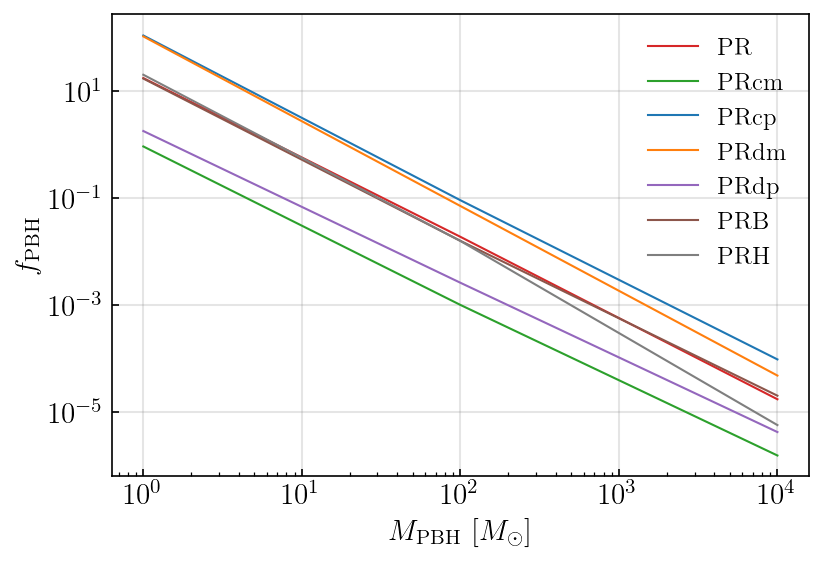

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs
plot_limits_simple(ax, 'pbhacc-PRc23-250630', label=r'PR')
plot_limits_simple(ax, 'pbhacc-PRc14-250630', label=r'PRcm')
plot_limits_simple(ax, 'pbhacc-PRc29-250630', label=r'PRcp')
plot_limits_simple(ax, 'pbhacc-PRc23dm-250630', label=r'PRdm')
plot_limits_simple(ax, 'pbhacc-PRc23dp-250630', label=r'PRdp')
plot_limits_simple(ax, 'pbhacc-PRc23B-250630', label=r'PRB')
plot_limits_simple(ax, 'pbhacc-PRc23H-250630', label=r'PRH')

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [$M_\odot$]', ylabel=r'$f_\mathrm{PBH}$')
ax.grid(color='0.5', alpha=0.2, linewidth=1, linestyle='-')
ax.legend(frameon=False)

# fig.savefig('paper2/pbhacc-limits.pdf', bbox_inches='tight')